In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('uttarakhand_landslide_dataset.csv')

In [15]:
print(df.isnull().sum())

Year                               0
District                           0
Elevation (m)                      0
Slope (°)                          0
Soil Type                          0
Rock Type                          0
Annual Rainfall (mm)               0
Extreme Rainfall Days              0
Temperature (°C)                   0
Forest Cover (%)                   0
Deforestation Rate (%)             0
Groundwater Level (m)              0
River Proximity (km)               0
Urban Expansion (%)                0
Road Density (km/sq. km)           0
Past Landslides                    0
Earthquake Frequency               0
Air Quality Index (AQI)            0
Water Pollution Index              0
Population Density (per sq. km)    0
Policy Effectiveness (0-10)        0
dtype: int64


In [16]:
lb_enc = LabelEncoder()
cat_col = ['Soil Type','Rock Type']
for col in cat_col:
  df[col] = lb_enc.fit_transform(df[col])

In [17]:
mm_scale = MinMaxScaler()
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[num_col] = mm_scale.fit_transform(df[num_col])


**Exploratory Data Analysis**

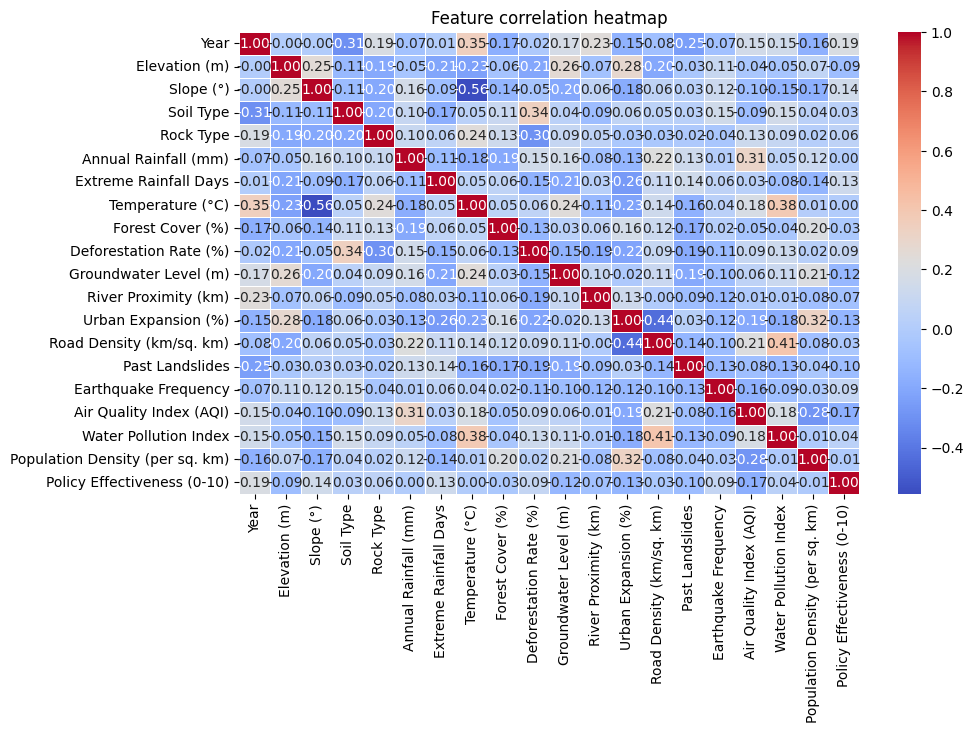

In [18]:
num_df = df.select_dtypes(include=['int64','float64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths='0.5')
plt.title('Feature correlation heatmap')
plt.show()



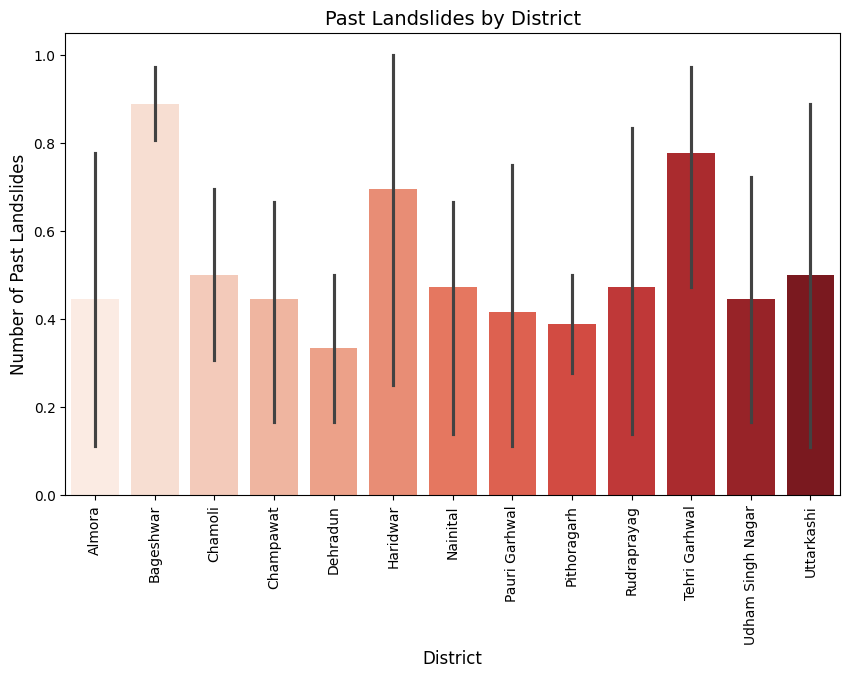

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['District'], y=df['Past Landslides'], palette='Reds')
plt.xticks(rotation=90)
plt.title("Past Landslides by District", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Past Landslides", fontsize=12)
plt.show()

**Identifying Features that contributes to landslide occurence**

Top Contributing Factors to Landslides:
Past Landslides                0.269495
Landslide Probability          0.226411
Forest Cover (%)               0.080564
Policy Effectiveness (0-10)    0.048603
River Proximity (km)           0.041586
Annual Rainfall (mm)           0.040584
Road Density (km/sq. km)       0.036315
Groundwater Level (m)          0.031752
Temperature (°C)               0.028211
Water Pollution Index          0.025236
dtype: float64


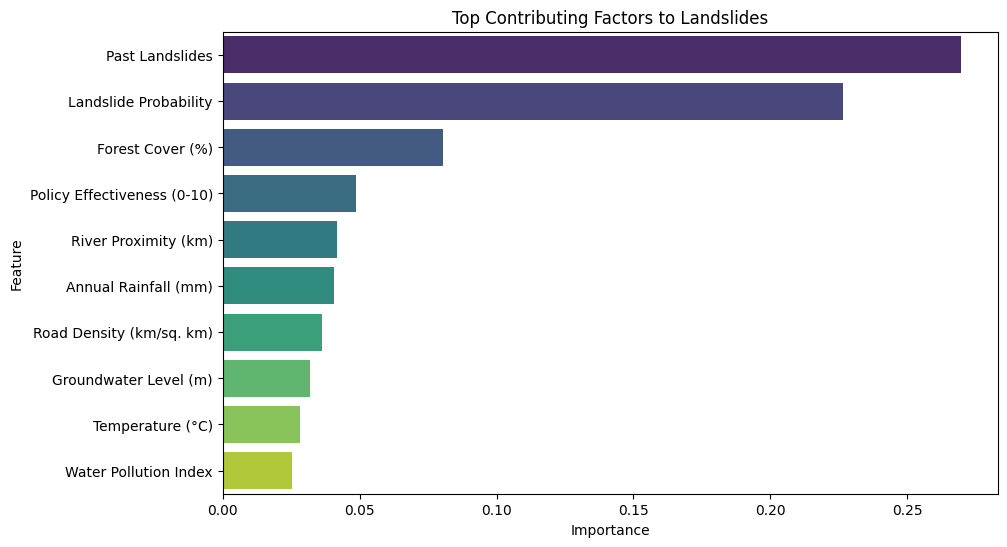

In [28]:
X = df.drop(['District'], axis=1)
y = (df['Past Landslides'] > 0).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display top contributing factors
top_factors = feature_importance.head(10)
print("Top Contributing Factors to Landslides:")
print(top_factors)

# Plot the top contributing factors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_factors.values, y=top_factors.index, palette='viridis')
plt.title('Top Contributing Factors to Landslides')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Probability of Landslide occurance**

Districts Prone to Landslides:

             District  Landslide Probability
10      Tehri Garhwal                 0.9725
3           Champawat                 0.9700
8         Pithoragarh                 0.9650
6            Nainital                 0.9600
11  Udham Singh Nagar                 0.9550
1           Bageshwar                 0.9500
2             Chamoli                 0.9350
4            Dehradun                 0.9200
12         Uttarkashi                 0.8025
9         Rudraprayag                 0.8000
0              Almora                 0.7950
7       Pauri Garhwal                 0.7950
5            Haridwar                 0.6350


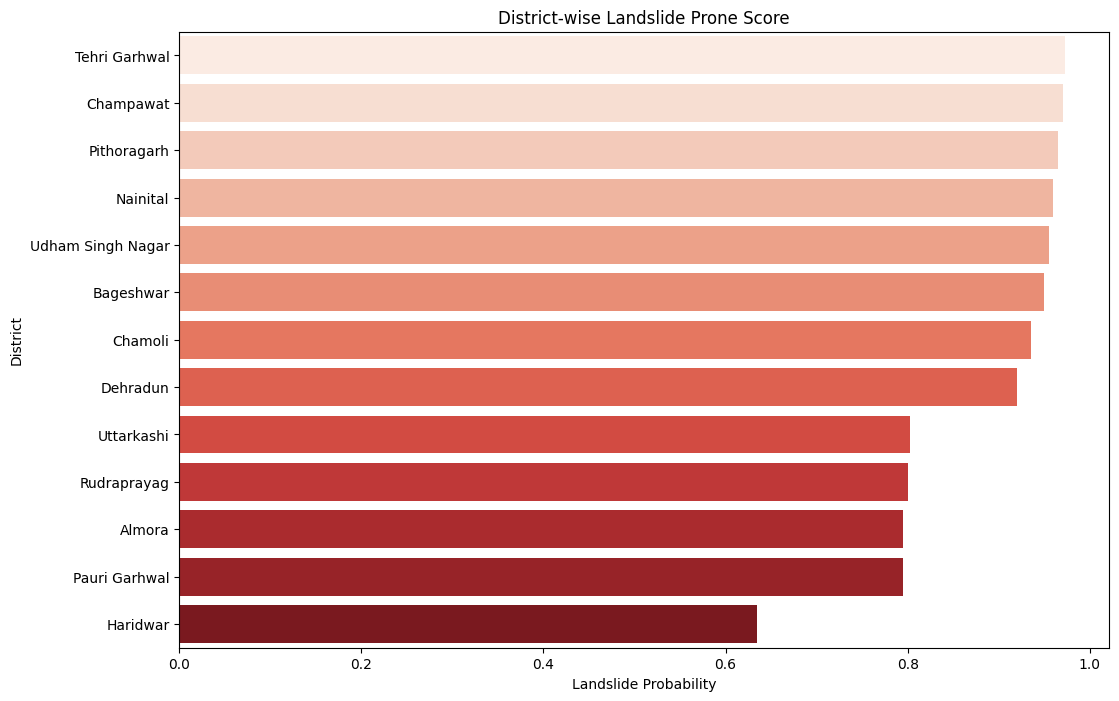


Overall State-wide Landslide Prone Score: 0.88

Final Result Table:
             District  Landslide Probability
10      Tehri Garhwal               0.972500
3           Champawat               0.970000
8         Pithoragarh               0.965000
6            Nainital               0.960000
11  Udham Singh Nagar               0.955000
1           Bageshwar               0.950000
2             Chamoli               0.935000
4            Dehradun               0.920000
12         Uttarkashi               0.802500
9         Rudraprayag               0.800000
0              Almora               0.795000
7       Pauri Garhwal               0.795000
5            Haridwar               0.635000
13      Overall State               0.881154


In [27]:
district_names = df['District']

X = df.drop(['District', 'Past Landslides'], axis=1)
y = (df['Past Landslides'] > 0).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict landslide probability for each row
df['Landslide Probability'] = rf.predict_proba(X)[:, 1]

# Group by district and calculate the mean probability
district_risk = df.groupby('District', as_index=False)['Landslide Probability'].mean().sort_values(by='Landslide Probability', ascending=False)

# Display top-prone districts
print("Districts Prone to Landslides:\n")
print(district_risk)

# Plot the top prone districts
plt.figure(figsize=(12, 8))
sns.barplot(x='Landslide Probability', y='District', data=district_risk, palette='Reds')
plt.title('District-wise Landslide Prone Score')
plt.xlabel('Landslide Probability')
plt.ylabel('District')
plt.show()

# Calculate the overall state-wide landslide risk (mean probability)
state_risk = district_risk['Landslide Probability'].mean()
print(f"\nOverall State-wide Landslide Prone Score: {state_risk:.2f}")

# Add overall state risk to the final table
district_risk.loc[len(district_risk.index)] = ['Overall State', state_risk]

# Display the final result table
print("\nFinal Result Table:")
print(district_risk)